## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  62.108158  1717.147337  0.731213  7.906284  1.422172
1  54.904015   144.226368  0.166826  2.182521  0.216905
2  57.726822   612.981439  0.357008  5.677089  1.321388
3  63.701698  1085.631154  0.004973  6.508593 -0.055851
4  27.872332  1055.104778  0.329111  9.118177  1.519846


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.7493749	total: 69.4ms	remaining: 1m 9s
1:	learn: 0.7428267	total: 69.8ms	remaining: 34.8s
2:	learn: 0.7362159	total: 70.3ms	remaining: 23.4s
3:	learn: 0.7299379	total: 70.9ms	remaining: 17.7s
4:	learn: 0.7241186	total: 71.3ms	remaining: 14.2s
5:	learn: 0.7173914	total: 71.9ms	remaining: 11.9s
6:	learn: 0.7107703	total: 72.4ms	remaining: 10.3s
7:	learn: 0.7040932	total: 72.8ms	remaining: 9.03s
8:	learn: 0.6982191	total: 73.3ms	remaining: 8.07s
9:	learn: 0.6918389	total: 73.7ms	remaining: 7.3s
10:	learn: 0.6853697	total: 74.2ms	remaining: 6.67s
11:	learn: 0.6801473	total: 74.7ms	remaining: 6.15s
12:	learn: 0.6751852	total: 75.1ms	remaining: 5.7s
13:	learn: 0.6680938	total: 75.7ms	remaining: 5.33s
14:	learn: 0.6615724	total: 76.1ms	remaining: 5s
15:	learn: 0.6552611	total: 76.4ms	remaining: 4.7s
16:	learn: 0.6488241	total: 76.9ms	remaining: 4.45s
17:	learn: 0.6427399	total: 77.4ms	remaining: 4.22s
18:	learn: 0.6379033	total: 77.8ms	remaining: 4.02

90:	learn: 0.3951680	total: 110ms	remaining: 1.1s
91:	learn: 0.3927677	total: 110ms	remaining: 1.09s
92:	learn: 0.3915304	total: 110ms	remaining: 1.08s
93:	learn: 0.3883584	total: 111ms	remaining: 1.07s
94:	learn: 0.3853989	total: 111ms	remaining: 1.06s
95:	learn: 0.3842410	total: 112ms	remaining: 1.05s
96:	learn: 0.3816418	total: 112ms	remaining: 1.04s
97:	learn: 0.3794326	total: 113ms	remaining: 1.04s
98:	learn: 0.3775012	total: 113ms	remaining: 1.03s
99:	learn: 0.3752077	total: 114ms	remaining: 1.02s
100:	learn: 0.3734210	total: 114ms	remaining: 1.01s
101:	learn: 0.3718444	total: 114ms	remaining: 1.01s
102:	learn: 0.3704573	total: 115ms	remaining: 999ms
103:	learn: 0.3684880	total: 115ms	remaining: 992ms
104:	learn: 0.3665033	total: 116ms	remaining: 985ms
105:	learn: 0.3644718	total: 116ms	remaining: 977ms
106:	learn: 0.3630512	total: 116ms	remaining: 971ms
107:	learn: 0.3608984	total: 117ms	remaining: 965ms
108:	learn: 0.3599046	total: 117ms	remaining: 958ms
109:	learn: 0.3581946	t

278:	learn: 0.1934425	total: 187ms	remaining: 482ms
279:	learn: 0.1928519	total: 187ms	remaining: 481ms
280:	learn: 0.1917538	total: 187ms	remaining: 480ms
281:	learn: 0.1911510	total: 188ms	remaining: 478ms
282:	learn: 0.1906976	total: 188ms	remaining: 477ms
283:	learn: 0.1897792	total: 189ms	remaining: 476ms
284:	learn: 0.1893592	total: 189ms	remaining: 474ms
285:	learn: 0.1888128	total: 190ms	remaining: 473ms
286:	learn: 0.1886244	total: 190ms	remaining: 472ms
287:	learn: 0.1879506	total: 190ms	remaining: 471ms
288:	learn: 0.1870239	total: 191ms	remaining: 470ms
289:	learn: 0.1864405	total: 191ms	remaining: 468ms
290:	learn: 0.1862232	total: 192ms	remaining: 467ms
291:	learn: 0.1855776	total: 192ms	remaining: 466ms
292:	learn: 0.1850491	total: 193ms	remaining: 465ms
293:	learn: 0.1841482	total: 193ms	remaining: 463ms
294:	learn: 0.1838059	total: 193ms	remaining: 462ms
295:	learn: 0.1833679	total: 194ms	remaining: 461ms
296:	learn: 0.1828264	total: 194ms	remaining: 459ms
297:	learn: 

515:	learn: 0.0824514	total: 290ms	remaining: 272ms
516:	learn: 0.0821130	total: 291ms	remaining: 272ms
517:	learn: 0.0816790	total: 291ms	remaining: 271ms
518:	learn: 0.0813032	total: 292ms	remaining: 270ms
519:	learn: 0.0808695	total: 292ms	remaining: 270ms
520:	learn: 0.0805079	total: 293ms	remaining: 269ms
521:	learn: 0.0799544	total: 293ms	remaining: 268ms
522:	learn: 0.0795442	total: 293ms	remaining: 268ms
523:	learn: 0.0790061	total: 294ms	remaining: 267ms
524:	learn: 0.0786478	total: 294ms	remaining: 266ms
525:	learn: 0.0782524	total: 295ms	remaining: 266ms
526:	learn: 0.0779005	total: 295ms	remaining: 265ms
527:	learn: 0.0775590	total: 296ms	remaining: 264ms
528:	learn: 0.0771758	total: 296ms	remaining: 264ms
529:	learn: 0.0769267	total: 297ms	remaining: 263ms
530:	learn: 0.0765399	total: 297ms	remaining: 263ms
531:	learn: 0.0762959	total: 298ms	remaining: 262ms
532:	learn: 0.0759564	total: 298ms	remaining: 261ms
533:	learn: 0.0757173	total: 298ms	remaining: 260ms
534:	learn: 

688:	learn: 0.0451347	total: 369ms	remaining: 166ms
689:	learn: 0.0450422	total: 369ms	remaining: 166ms
690:	learn: 0.0448314	total: 370ms	remaining: 165ms
691:	learn: 0.0447412	total: 370ms	remaining: 165ms
692:	learn: 0.0446832	total: 370ms	remaining: 164ms
693:	learn: 0.0444981	total: 371ms	remaining: 163ms
694:	learn: 0.0444228	total: 371ms	remaining: 163ms
695:	learn: 0.0442845	total: 372ms	remaining: 162ms
696:	learn: 0.0441977	total: 372ms	remaining: 162ms
697:	learn: 0.0440607	total: 372ms	remaining: 161ms
698:	learn: 0.0438839	total: 373ms	remaining: 161ms
699:	learn: 0.0437975	total: 373ms	remaining: 160ms
700:	learn: 0.0436633	total: 374ms	remaining: 159ms
701:	learn: 0.0435784	total: 374ms	remaining: 159ms
702:	learn: 0.0435040	total: 374ms	remaining: 158ms
703:	learn: 0.0433715	total: 375ms	remaining: 158ms
704:	learn: 0.0433188	total: 375ms	remaining: 157ms
705:	learn: 0.0431853	total: 376ms	remaining: 156ms
706:	learn: 0.0430759	total: 376ms	remaining: 156ms
707:	learn: 

930:	learn: 0.0242495	total: 473ms	remaining: 35ms
931:	learn: 0.0241744	total: 473ms	remaining: 34.5ms
932:	learn: 0.0241319	total: 474ms	remaining: 34ms
933:	learn: 0.0240583	total: 474ms	remaining: 33.5ms
934:	learn: 0.0239804	total: 474ms	remaining: 33ms
935:	learn: 0.0239411	total: 475ms	remaining: 32.5ms
936:	learn: 0.0238752	total: 475ms	remaining: 31.9ms
937:	learn: 0.0238331	total: 476ms	remaining: 31.4ms
938:	learn: 0.0237773	total: 476ms	remaining: 30.9ms
939:	learn: 0.0236823	total: 477ms	remaining: 30.4ms
940:	learn: 0.0236074	total: 477ms	remaining: 29.9ms
941:	learn: 0.0235340	total: 477ms	remaining: 29.4ms
942:	learn: 0.0234923	total: 478ms	remaining: 28.9ms
943:	learn: 0.0234449	total: 478ms	remaining: 28.4ms
944:	learn: 0.0234038	total: 478ms	remaining: 27.8ms
945:	learn: 0.0233318	total: 479ms	remaining: 27.3ms
946:	learn: 0.0232912	total: 479ms	remaining: 26.8ms
947:	learn: 0.0232449	total: 480ms	remaining: 26.3ms
948:	learn: 0.0231785	total: 480ms	remaining: 25.8ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

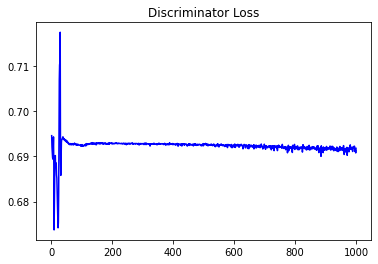

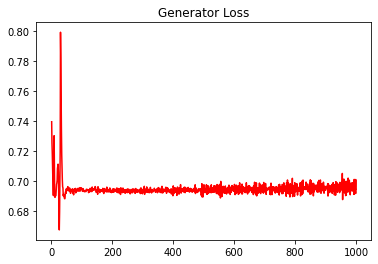

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
1.1589751732104745


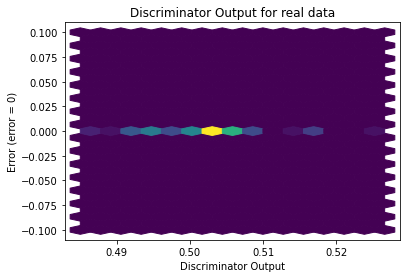

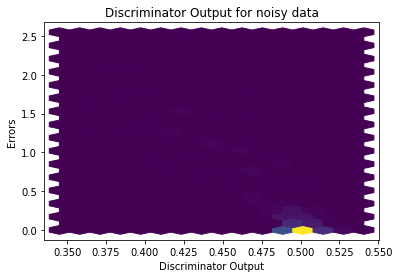

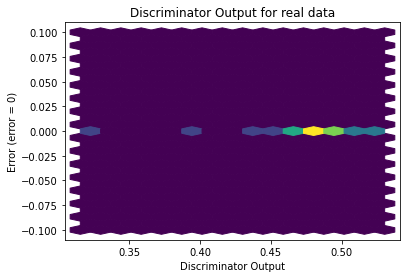

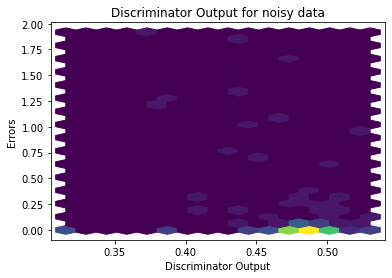

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


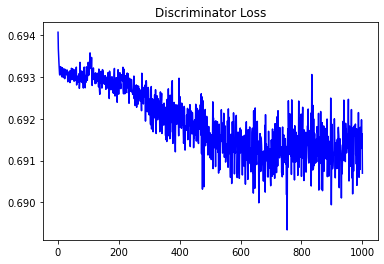

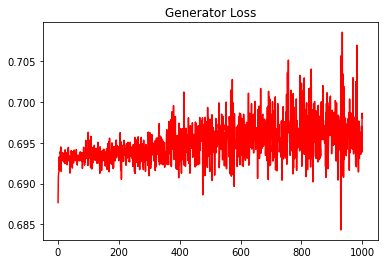

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
1.2630388100877525


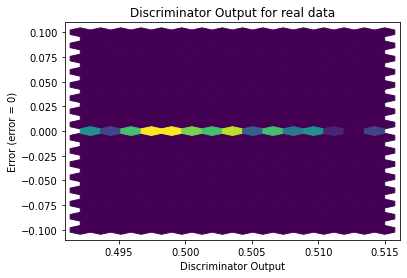

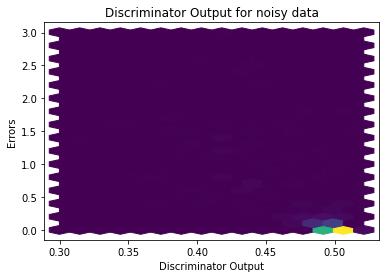

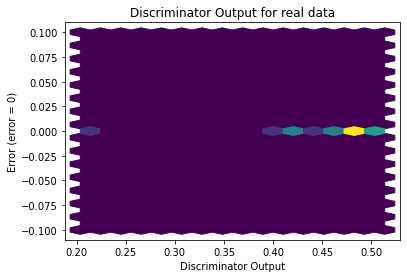

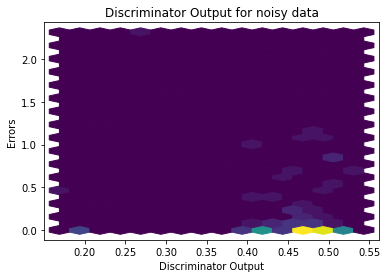

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1396]], requires_grad=True)
